In [1]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
"""
Upload do arquivo
Atenção para os comandos necessários para fazer a leitura do arquivo!
"""

df = pd.read_csv(r"datasets\AdventureWorks.csv", sep=";", on_bad_lines='skip', encoding='latin-1')
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,09/05/2008 00:00,29/05/2008 00:00,199,384,18839,200805093CS607,"348,58",758,6,0,4548,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,12/05/2008 00:00,17/05/2008 00:00,306,384,19051,200805123CS567,"348,58",758,6,0,4548,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,14/05/2008 00:00,20/05/2008 00:00,306,384,19052,200805143CS576,"348,58",758,6,0,4548,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,21/05/2008 00:00,27/05/2008 00:00,306,384,19052,200805213CS576,"348,58",758,6,0,4548,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,20/06/2008 00:00,27/06/2008 00:00,306,384,19053,200806203CS586,"348,58",758,6,0,4548,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [3]:
df.shape   # Obtem o número de rows (linhas) e colunas
df.info()  # Obtem informações gerais sobre o BD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data Venda      904 non-null    object
 1   Data Envio      904 non-null    object
 2   ID Loja         904 non-null    int64 
 3   ID Produto      904 non-null    int64 
 4   ID Cliente      904 non-null    int64 
 5   No. Venda       904 non-null    object
 6   Custo Unitário  904 non-null    object
 7   Preço Unitário  904 non-null    object
 8   Quantidade      904 non-null    int64 
 9   Valor Desconto  904 non-null    object
 10  Valor Venda     904 non-null    object
 11  Produto         904 non-null    object
 12  Fabricante      904 non-null    object
 13  Marca           904 non-null    object
 14  Classe          904 non-null    object
 15  Cor             904 non-null    object
dtypes: int64(4), object(12)
memory usage: 113.1+ KB


In [4]:
# Converter os nomes das colunas para o formato snake_case:

df.columns=[col.lower().replace(" ","_") for col in df.columns]
df.columns

Index(['data_venda', 'data_envio', 'id_loja', 'id_produto', 'id_cliente',
       'no._venda', 'custo_unitário', 'preço_unitário', 'quantidade',
       'valor_desconto', 'valor_venda', 'produto', 'fabricante', 'marca',
       'classe', 'cor'],
      dtype='object')

In [5]:
# Foi usada a vírgula para fazer a separação dos números decimais,
# por isso as colunas numéricas foram reconhecidas como objects
# temos que fazer a troca para pontos

df["custo_unitário"] = [item.replace(",", ".") for item in df["custo_unitário"]]
df["preço_unitário"] = [item.replace(",", ".") for item in df["preço_unitário"]]
df["valor_desconto"] = [item.replace(",", ".") for item in df["valor_desconto"]]
df["valor_venda"] = [item.replace(",", ".") for item in df["valor_venda"]]

In [6]:
# Agora podemos converter as colunas para float 

df["custo_unitário"] = df["custo_unitário"].astype("float")
df["preço_unitário"] = df["preço_unitário"].astype("float")
df["valor_desconto"] = df["valor_desconto"].astype("float")
df["valor_venda"] = df["valor_venda"].astype("float")

df.sample(4)

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor
762,03/12/2008 00:00,10/12/2008 00:00,199,2497,18893,200812035CS800,5.09,9.99,156,311.688,1246.752,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White
296,16/09/2009 00:00,25/09/2009 00:00,307,2497,19135,200909165CS725,5.09,9.99,240,0.000,2397.600,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White
259,27/10/2008 00:00,07/11/2008 00:00,307,2496,19107,200810275CS646,5.09,9.99,240,0.000,2397.600,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver
574,05/01/2008 00:00,15/01/2008 00:00,306,1178,19046,200801054CS525,330.66,998.00,8,1596.800,6387.200,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White


In [7]:
# Calculando o custo total por venda:

df["custo"] = df["custo_unitário"].mul(df["quantidade"])

In [8]:
df.sample(1)

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo
204,15/05/2008 00:00,21/05/2008 00:00,306,1155,19052,200805154CS576,324.69,980.0,12,0.0,11760.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3896.28


In [9]:
# Cálculo do custo total

round(df["custo"].sum(), 2)

2486783.05

In [10]:
# Calculando o lucro por venda:
df["lucro"] = df["valor_venda"] - df["custo"]

In [11]:
df.sample(1)

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo,lucro
417,18/12/2008 00:00,23/12/2008 00:00,307,1178,19111,200812184CS669,330.66,998.0,9,1347.3,7634.7,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,2975.94,4658.76


In [12]:
# Cálculo do lucro total

round(df["lucro"].sum(), 2)

3497823.09

In [13]:
df["data_venda"]

0      09/05/2008 00:00
1      12/05/2008 00:00
2      14/05/2008 00:00
3      21/05/2008 00:00
4      20/06/2008 00:00
             ...       
899    22/03/2008 00:00
900    04/10/2008 00:00
901    11/12/2008 00:00
902    17/12/2008 00:00
903    21/12/2008 00:00
Name: data_venda, Length: 904, dtype: object

In [14]:
# Convertendo as colunas de data:


df['data_venda'] = pd.to_datetime(df['data_venda'], format='%d/%m/%Y %H:%M') # Para dar certo tem que colocar os espaçadores!
df['data_envio'] = pd.to_datetime(df['data_envio'], format='%d/%m/%Y %H:%M')
df.sample(5)

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo,lucro
903,2008-12-21,2008-12-25,306,1155,19060,200812214CS676,324.69,980.0,6,1176.0,4704.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,2755.86
454,2009-02-23,2009-03-06,307,366,19117,200902233CS706,348.58,758.0,16,2425.6,9702.4,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,5577.28,4125.12
401,2009-11-10,2009-11-18,199,1178,19014,200911104CS929,330.66,998.0,20,3992.0,15968.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,6613.20,9354.80
235,2008-06-22,2008-06-29,306,1226,19053,200806224CS586,330.99,999.0,24,0.0,23976.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,7943.76,16032.24
212,2009-05-23,2009-06-04,306,366,19068,200905233CS748,348.58,758.0,18,0.0,13644.0,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,6274.44,7369.56


In [15]:
# Tempo de envio do produto
df["tempo_envio"] = df["data_envio"] - df["data_venda"]
df.sample(1)

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo,lucro,tempo_envio
790,2009-02-23,2009-03-06,307,2497,19117,200902235CS706,5.09,9.99,216,431.568,1726.272,Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,1099.44,626.832,11 days


In [16]:
df["tempo_envio"].mean()

Timedelta('8 days 13:02:07.433628318')

In [17]:
df.groupby("marca")["tempo_envio"].mean()

marca
Adventure Works   8 days 15:55:57.983193277
Contoso           8 days 11:18:08.372093023
Fabrikam          8 days 12:14:34.493927125
Name: tempo_envio, dtype: timedelta64[ns]

In [18]:
# Não temos valores ausentes!

df.isnull().sum()

data_venda        0
data_envio        0
id_loja           0
id_produto        0
id_cliente        0
no._venda         0
custo_unitário    0
preço_unitário    0
quantidade        0
valor_desconto    0
valor_venda       0
produto           0
fabricante        0
marca             0
classe            0
cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

In [19]:
# Verificar o lucro por ano e por marca:

df.groupby([df["data_venda"].dt.year, "marca"])["lucro"].sum()

data_venda  marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [20]:
# Alterando a formatação dos números

pd.options.display.float_format = "{:20,.2f}".format
df.groupby([df["data_venda"].dt.year, "marca"])["lucro"].sum()

data_venda  marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [21]:
# podemos melhorar a exibição do lucro através do comando reset_index:

lucro_ano = df.groupby([df["data_venda"].dt.year, "marca"])["lucro"].sum().reset_index()
lucro_ano

,data_venda,marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [22]:
# Qual o total de produtos vendidos?

df.groupby("produto")["quantidade"].sum().sort_values(ascending=False).reset_index()

,produto,quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


Text(0, 0.5, 'Produto')

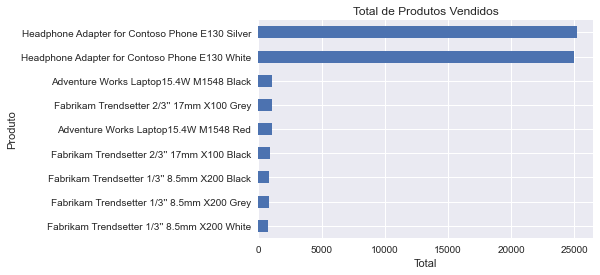

In [23]:
# Gráfico total de produtos vendidos:

df.groupby("produto")["quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

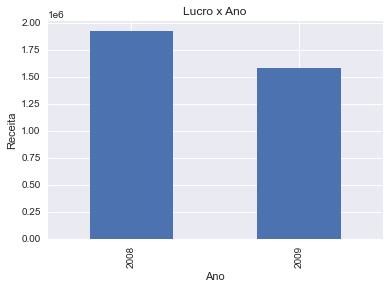

In [24]:
df.groupby(df["data_venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [25]:
df.groupby(df["data_venda"].dt.year)["lucro"].sum()

data_venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [26]:
df_2009 = df[df["data_venda"].dt.year == 2009]

In [27]:
df_2009.head()

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo,lucro,tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12 days
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11 days
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12 days
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13 days
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4 days


Text(0, 0.5, 'Lucro')

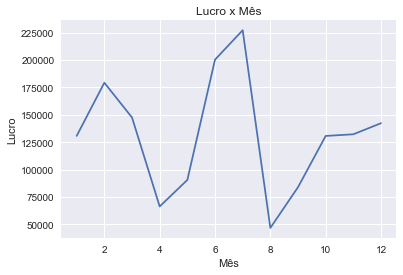

In [28]:
df_2009.groupby(df_2009["data_venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

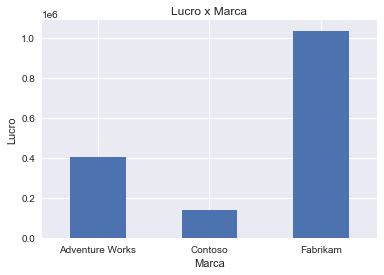

In [29]:
df_2009.groupby(df_2009["marca"])["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal"); # altera a posição dos labels

# o ponto e virgula ao final faz desaparecer a descrição inicial do gráfico

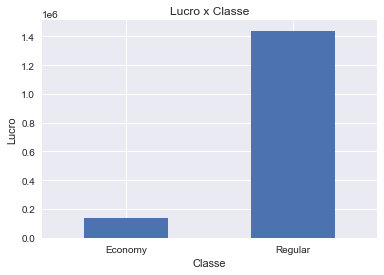

In [30]:
df_2009.groupby(df_2009["classe"])["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal"); # altera a posição dos labels

In [31]:
df["tempo_envio"].describe().reset_index()

,index,tempo_envio
0,count,904
1,mean,8 days 13:02:07.433628318
2,std,3 days 01:21:57.877052211
3,min,4 days 00:00:00
4,25%,6 days 00:00:00
5,50%,9 days 00:00:00
6,75%,11 days 00:00:00
7,max,20 days 00:00:00


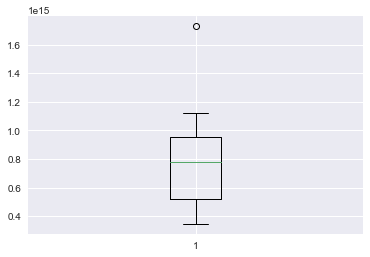

In [32]:
# Boxplot

plt.boxplot(df["tempo_envio"]);

TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)

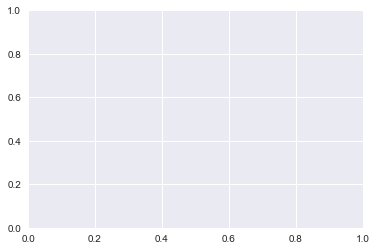

In [34]:
plt.hist(df["tempo_envio"]);

In [36]:
df["tempo_envio"].max()

Timedelta('20 days 00:00:00')

In [37]:
df[df["tempo_envio"] == 20]

,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor,custo,lucro,tempo_envio
